<a href="https://colab.research.google.com/github/olley102/CommunityDetectionURSS/blob/main/project_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project automation

Before object tracking, first we need to run previous stages of the project for the second frame. Then we can test the method using the first two frames.

In [1]:
!git clone https://github.com/olley102/CommunityDetectionURSS.git

Cloning into 'CommunityDetectionURSS'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 251 (delta 27), reused 31 (delta 15), pack-reused 207
Receiving objects: 100% (251/251), 7.82 MiB | 25.51 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [2]:
import sys
sys.path.append('/content/CommunityDetectionURSS')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 14.6 MB/s 


In [5]:
import automate_project as app

In [6]:
data_fp = '/content/drive/My Drive/GoogleEarthEngine/GPW_v411_pc_time{}.tif'
checkpoint_fp = '/content/checkpoints/checkpoint_{frame}_{epoch}.hdf5'

In [7]:
proj = app.Project(data_fp, checkpoint_fp, 5)

In [8]:
proj.load_data()

From this point on, we'll only look at the first two frames. Training only needs to be done on the second frame.

In [9]:
import numpy as np

In [10]:
import image_processing as ip

In [11]:
uv = ip.optical_flow.iteration(proj.images, 1, alpha=10, use_previous=True, centering=(0, 0, 0))
image = np.dstack((proj.images[..., 1], np.moveaxis(uv[..., 1], 0, -1)))
image = np.clip(image, None, 1000)
ae = ip.nn.WindowAE(window_size=(7, 7), num_channels=3)
ae.auto_decoder_sizes((128, 64, 16))
ae.make()
ae.compile()
ae.make_callback(proj.checkpoint_fp.format(frame=1, epoch='epoch'), period=10)
ae.fit_transform(image)
proj.autoencoders[1] = ae

In [12]:
proj.uv = uv

In [12]:
# proj.autoencoders[0].load_epoch('/content/drive/My Drive/Colab Notebooks/Files/checkpoint_{epoch}.hdf5', 200)

True

In [13]:
# !mkdir /content/checkpoints

In [14]:
# (hist2,) = proj.fit_autoencoders((1,))

32/32 [==============================] - 1s 3ms/step - loss: 0.0828 - mse: 0.0828
Epoch 2/2
32/32 [==============================] - 0s 3ms/step - loss: 0.0054 - mse: 0.0054
Epoch 3/3
32/32 [==============================] - 0s 4ms/step - loss: 0.0020 - mse: 0.0020
Epoch 4/4
32/32 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 9.5241e-04 - mse: 9.5241e-04
Epoch 6/6
32/32 [==============================] - 0s 3ms/step - loss: 8.8534e-04 - mse: 8.8534e-04
Epoch 7/7
32/32 [==============================] - 0s 4ms/step - loss: 7.0333e-04 - mse: 7.0333e-04
Epoch 8/8
32/32 [==============================] - 0s 3ms/step - loss: 9.1993e-04 - mse: 9.1993e-04
Epoch 9/9
32/32 [==============================] - 0s 4ms/step - loss: 6.4524e-04 - mse: 6.4524e-04
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 8.3019e-04 - mse: 8.3019e-04
Epoch 11/11
32/32 [=====================

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'mse')

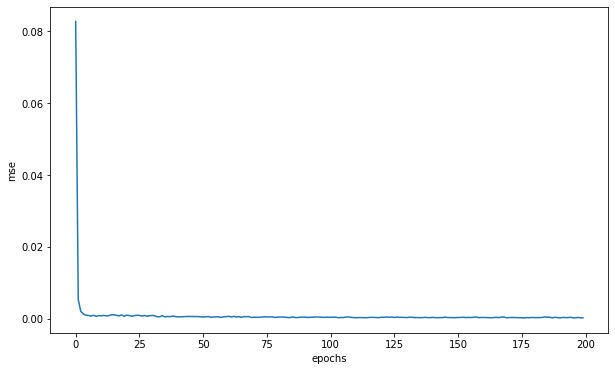

In [17]:
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot()
# history_arr = [h.history['mse'][0] for h in hist2]
# ax.plot(history_arr)
# ax.set_xlabel('epochs')
# ax.set_ylabel('mse')

In [18]:
# !cp /content/checkpoints/checkpoint_1_200.hdf5 /content/drive/My\ Drive/Colab\ Notebooks/Files/checkpoint_1_200.hdf5

In [ ]:
# proj.load_epochs((1,), (200,))

In [14]:
proj.autoencoders[1].load_epoch('/content/drive/My Drive/Colab Notebooks/Files/checkpoint_1_{epoch}.hdf5', 200)

True

In [15]:
proj.images.shape

(1796, 1105, 5)

In [23]:
# (encoding1,) = proj.encode((1,))

Encoding pixels 0:11050
Encoding pixels 11050:22100
Encoding pixels 22100:33150
Encoding pixels 33150:44200
Encoding pixels 44200:55250
Encoding pixels 55250:66300
Encoding pixels 66300:77350
Encoding pixels 77350:88400
Encoding pixels 88400:99450
Encoding pixels 99450:110500
Encoding pixels 110500:121550
Encoding pixels 121550:132600
Encoding pixels 132600:143650
Encoding pixels 143650:154700
Encoding pixels 154700:165750
Encoding pixels 165750:176800
Encoding pixels 176800:187850
Encoding pixels 187850:198900
Encoding pixels 198900:209950
Encoding pixels 209950:221000
Encoding pixels 221000:232050
Encoding pixels 232050:243100
Encoding pixels 243100:254150
Encoding pixels 254150:265200
Encoding pixels 265200:276250
Encoding pixels 276250:287300
Encoding pixels 287300:298350
Encoding pixels 298350:309400
Encoding pixels 309400:320450
Encoding pixels 320450:331500
Encoding pixels 331500:342550
Encoding pixels 342550:353600
Encoding pixels 353600:364650
Encoding pixels 364650:375700
Enc

In [24]:
# np.save('/content/drive/My Drive/Colab Notebooks/Files/encoding_1.npy', encoding1)

In [16]:
encoding1 = np.load('/content/drive/My Drive/Colab Notebooks/Files/encoding_1.npy')

In [17]:
proj.encodings[1] = encoding1

In [25]:
# (pred1,) = proj.predict((1,))

Predicting pixels 0:11050
Predicting pixels 11050:22100
Predicting pixels 22100:33150
Predicting pixels 33150:44200
Predicting pixels 44200:55250
Predicting pixels 55250:66300
Predicting pixels 66300:77350
Predicting pixels 77350:88400
Predicting pixels 88400:99450
Predicting pixels 99450:110500
Predicting pixels 110500:121550
Predicting pixels 121550:132600
Predicting pixels 132600:143650
Predicting pixels 143650:154700
Predicting pixels 154700:165750
Predicting pixels 165750:176800
Predicting pixels 176800:187850
Predicting pixels 187850:198900
Predicting pixels 198900:209950
Predicting pixels 209950:221000
Predicting pixels 221000:232050
Predicting pixels 232050:243100
Predicting pixels 243100:254150
Predicting pixels 254150:265200
Predicting pixels 265200:276250
Predicting pixels 276250:287300
Predicting pixels 287300:298350
Predicting pixels 298350:309400
Predicting pixels 309400:320450
Predicting pixels 320450:331500
Predicting pixels 331500:342550
Predicting pixels 342550:353600

Text(0.5, 1.0, 'Prediction')

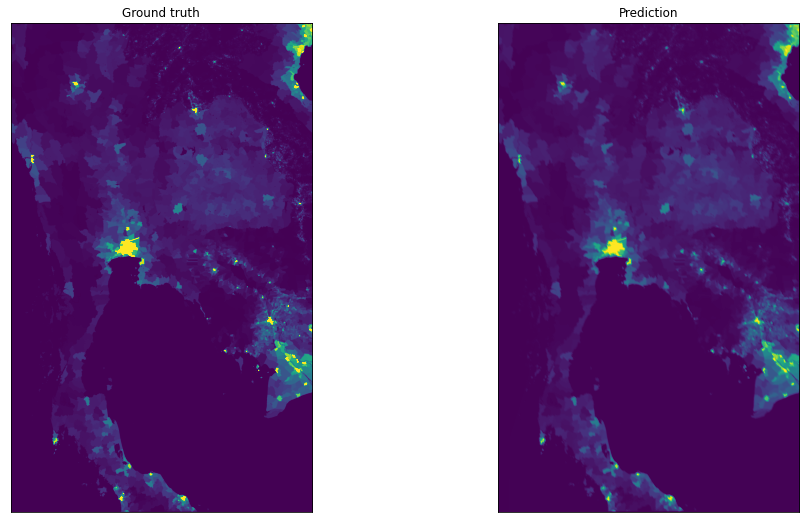

In [26]:
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(proj.images[..., 1], vmin=0, vmax=1000)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_title('Ground truth')

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(pred1[..., 0], vmin=0, vmax=1000)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_title('Prediction')

In [28]:
# (sse1,) = proj.sse_search((1,))

Trying 2 clusters for frame 1
Trying 3 clusters for frame 1
Trying 4 clusters for frame 1
Trying 5 clusters for frame 1
Trying 6 clusters for frame 1
Trying 7 clusters for frame 1
Trying 8 clusters for frame 1
Trying 9 clusters for frame 1
Trying 10 clusters for frame 1
Trying 11 clusters for frame 1
Trying 12 clusters for frame 1
Trying 13 clusters for frame 1
Trying 14 clusters for frame 1
Trying 15 clusters for frame 1
Trying 16 clusters for frame 1
Trying 17 clusters for frame 1
Trying 18 clusters for frame 1
Trying 19 clusters for frame 1
Trying 20 clusters for frame 1


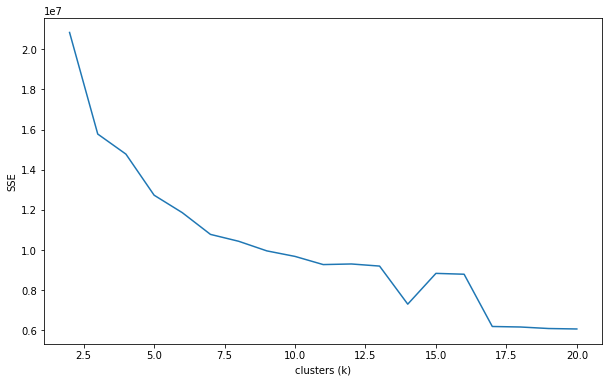

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.set_xlabel('clusters (k)')
ax.set_ylabel('SSE')
ax.plot(np.arange(2, 21), sse1)

In [18]:
encoding0 = np.load('/content/drive/My Drive/Colab Notebooks/Files/encoding.npy')

In [19]:
encoding0.shape

(1796, 1105, 16)

In [20]:
proj.encodings[0] = encoding0.reshape(-1, 16)

In [21]:
proj.kmeans_segmentation((0,))

In [21]:
proj.kmeans_segmentation((1,))

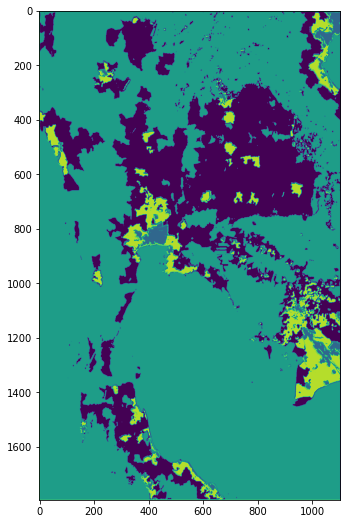

In [22]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
ax.imshow(proj.kmeans_images[..., 1])

In [23]:
dbscan_labels0 = np.load('/content/drive/My Drive/Colab Notebooks/Files/dbscan_labels.npy')
proj.dbscan_images[..., 0] = dbscan_labels0

In [27]:
np.save('/content/drive/My Drive/Colab Notebooks/Files/dbscan_labels1.npy', proj.dbscan_images[..., 1])

In [24]:
proj.dbscan_segmentation((1,))

In [25]:
(assignments,) = proj.object_tracking((0,))

ValueError: ignored

In [26]:
ip.optical_flow.object_tracking(
    proj.images[..., 0], proj.images[..., 1],
    proj.dbscan_images[..., 0], proj.dbscan_images[..., 1],
    n=1, alpha=10
)

ValueError: ignored